In [3]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

/tmp/ipykernel_146/1994989634.py:11: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('sentiment_tweets - Copy2.csv')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               10314 non-null  int64  
 1   Tweet_Content       10314 non-null  object 
 2   negative_score      10314 non-null  float64
 3   positive_score      10314 non-null  float64
 4   neutral_score       10314 non-null  float64
 5   compound_score      10314 non-null  float64
 6   subjectivity_score  10314 non-null  float64
 7   label               10314 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 644.8+ KB


In [7]:
df.head()

,index,Tweet_Content,negative_score,positive_score,neutral_score,compound_score,subjectivity_score,label
0,106,just had a real good moment. i missssssssss hi...,0.0,0.225,0.775,0.4404,0.9956,0
1,217,is reading manga http://plurk.com/p/mzp1e,0.0,0.000,1.000,0.0000,0.0000,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0.0,0.000,1.000,0.0000,0.0000,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0.0,0.121,0.879,0.4404,0.9918,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0.0,0.000,1.000,0.0000,0.0000,0


In [8]:
features = df.iloc[:,2:7]
# features = features.iloc[1:]

print(features)
print(features.info())

       negative_score  positive_score  neutral_score  compound_score  \
0               0.000           0.225          0.775          0.4404   
1               0.000           0.000          1.000          0.0000   
2               0.000           0.000          1.000          0.0000   
3               0.000           0.121          0.879          0.4404   
4               0.000           0.000          1.000          0.0000   
...               ...             ...            ...             ...   
10309           0.106           0.128          0.766          0.1275   
10310           0.167           0.113          0.721         -0.2960   
10311           0.469           0.131          0.400         -0.7845   
10312           0.229           0.338          0.433          0.1950   
10313           0.000           0.000          1.000          0.0000   

       subjectivity_score  
0                  0.9956  
1                  0.0000  
2                  0.0000  
3                  0.99

In [9]:
labels = df['label']
print(labels)

0        0
1        0
2        0
3        0
4        0
        ..
10309    1
10310    1
10311    1
10312    1
10313    1
Name: label, Length: 10314, dtype: int64


In [31]:
# from sklearn.preprocessing import MinMaxScaler

# features = MinMaxScaler().fit_transform(features)

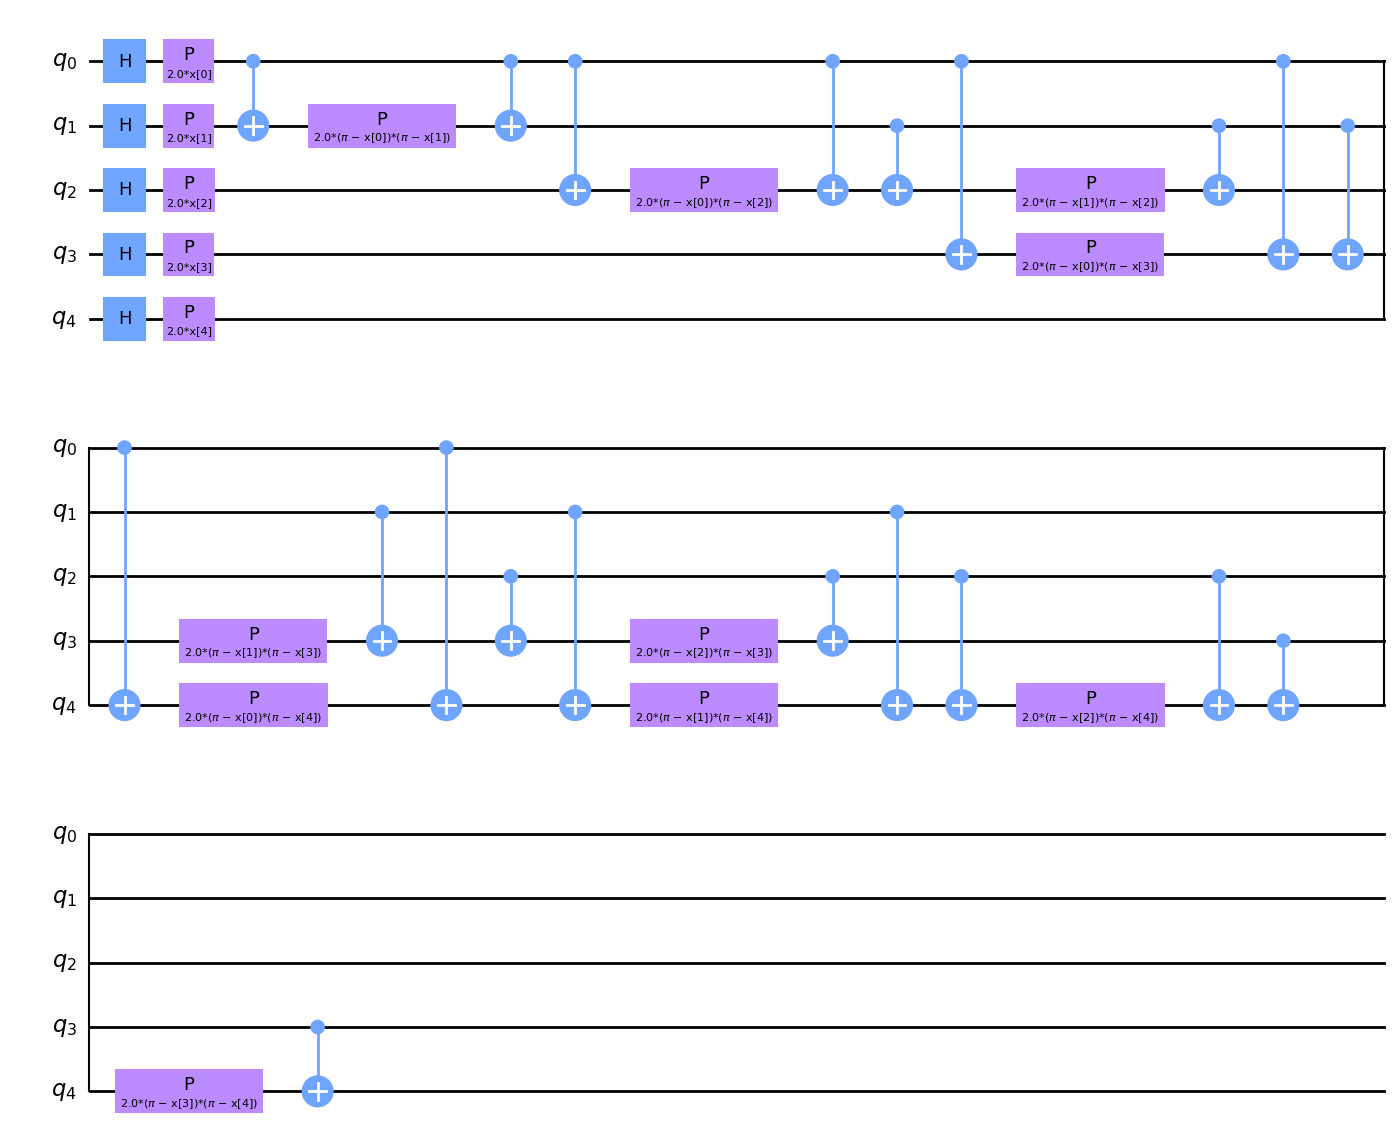

In [10]:

from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

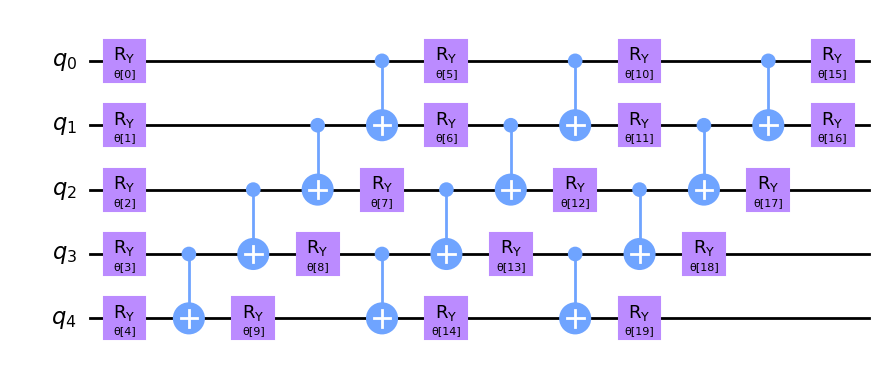

In [11]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [12]:
from qiskit.algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [13]:
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)


In [14]:
print(type(train_features))
# print(type(train_labels))
train_labels = np.array(train_labels)
print(type(train_labels))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [15]:
print(train_features)
print(train_labels)

      negative_score  positive_score  neutral_score  compound_score  \
2595           0.000           0.000          1.000          0.0000   
2743           0.000           0.336          0.664          0.7644   
4986           0.000           0.000          1.000          0.0000   
9913           0.142           0.042          0.816         -0.7777   
8370           0.393           0.000          0.607         -0.8271   
...              ...             ...            ...             ...   
9785           0.506           0.000          0.494         -0.8481   
7763           0.000           0.238          0.762          0.3612   
5218           0.000           0.000          1.000          0.0000   
1346           0.000           0.000          1.000          0.0000   
3582           0.000           0.143          0.857          0.4574   

      subjectivity_score  
2595              0.0000  
2743              0.9970  
4986              0.0000  
9913              0.5405  
8370        

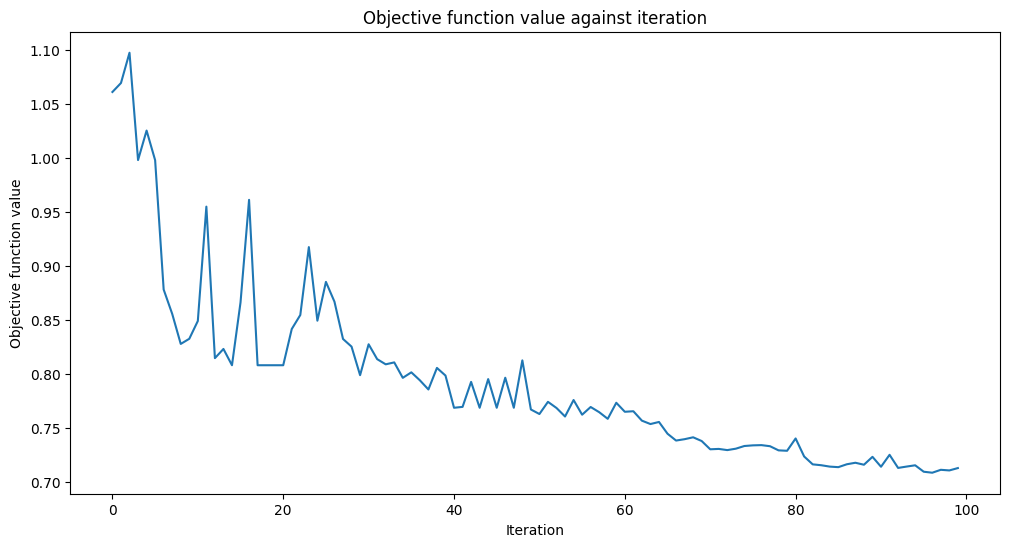

Training time: 9671 seconds


In [ ]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
from qiskit.primitives import Sampler

sampler = Sampler()

import time
from qiskit_machine_learning.algorithms.classifiers import VQC


objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
    


sampler = Sampler()


vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

In [55]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.86
Quantum VQC on the test dataset:     0.86
